# Evaluación del desempeño y capacidad de predicción del modelo

para evaluar el desempeño y capacidad 
de predicción del mapa de susceptibilidad obtenido 
con los modelos implementados, se utilizaron la 
Curva de Éxito, Curva de Predicción (Chung y Fabbri, 
2003; Davis y Goodrich, 1990) y Área Bajo la Curva 
(AUC) (Fawcett, 2006). Para esto, se dividió el total 
de movimientos en masa del inventario en 80% para la 
construcción del modelo de susceptibilidad y evaluación 
del desempeño, y el 20% restante de movimiento 
inventariados para evaluar la capacidad de predicción 
del modelo obtenido. Las Curvas de Éxito y Predicción 
se construyen estimando el porcentaje de movimientos
en masa contra el porcentaje del área de la cuenca para 
diferentes valores de susceptibilidad. El Área Bajo 
la Curva (AUC), el cual varía de 0 a 1, representa un 
valor global del desempeño o predicción del modelo, 
independiente de la clasificación en categorías de 
susceptibilidad del mapa. Curvas cercanas a la esquina 
superior izquierda presentan valores de AUC cercanos 
a 1 señalando un excelente desempeño del modelo, y 
valores cercanos a la diagonal, con AUC de 0,5, indican 
un pobre desempeño o predicción del modelo. Para la 
zonificación de la amenaza en alta, media y baja, se 
utilizó la Curva de Éxito como criterio cuantitativo en 
términos de probabilidad espacial.

In [ ]:
#Para utilizar validacion cruzada con el 80/20%
x_train,x_validation,y_train,y_validation=model_selection.train_test_split(x1, y, test_size=0.2, random_state=7)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_validation.shape)
print('Tamaño de labels de validación:', y_validation.shape)

Tamaño de variables de entrenamiento: (79248, 9)
Tamaño de labels de entrenamiento: (79248,)
Tamaño de variables de validación: (19812, 9)
Tamaño de labels de validación: (19812,)


In [ ]:
#Se crea el modelo de regresion logistica utilizando solo la base de datso de entrenamiento (80%) generada
result=model.fit(x_train,y_train)

C:\Users\usuario\.conda\envs\ml\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\usuario\.conda\envs\ml\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [ ]:
#las probabilidades para los datos de entrenamiento (80%) (desempeño)
y_train_pred=result.predict(x_train)
y_train_probs=result.predict_proba(x_train)[:,1]

In [ ]:
#Las probabilidades entonces para las celdas de validacion (20%) (predicción)
y_val_pred=result.predict(x_validation) #utiliza por defecto el valro de 0,5, por enciam es uno y por debajo es 0
y_val_probs=result.predict_proba(x_validation)[:,1]

In [ ]:
#matriz de confusion para desempeño
confusion_matrix(y_train, y_train_pred)

array([[52237, 24930],
       [  368,  1713]], dtype=int64)

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.68      0.81     77167
         1.0       0.06      0.82      0.12      2081

    accuracy                           0.68     79248
   macro avg       0.53      0.75      0.46     79248
weighted avg       0.97      0.68      0.79     79248



TypeError: 'str' object is not callable

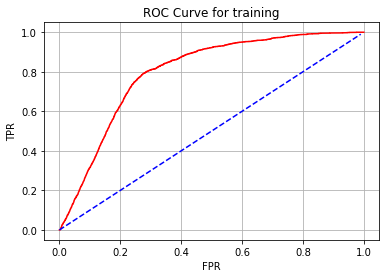

In [ ]:
#Curva ROC y AUC utilizando metrics.roc_curve para desempeño
fpr, tpr, _=roc_curve(y_train,y_train_probs)
plt.plot(fpr,tpr,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training')
auc=str(round(auc(fpr,tpr),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

### Capacidad de predicción

In [ ]:
confusion_matrix(y_validation, y_val_pred)

array([[12916,  6346],
       [   83,   467]], dtype=int64)

In [ ]:
print(classification_report(y_validation,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.67      0.80     19262
         1.0       0.07      0.85      0.13       550

    accuracy                           0.68     19812
   macro avg       0.53      0.76      0.46     19812
weighted avg       0.97      0.68      0.78     19812



Text(0.7, 0.1, 'AUC=0.8052%')

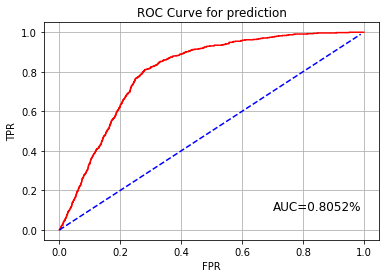

In [ ]:
#Curva ROC y AUC utilizando metrics.roc_curve
fpr, sensitivity, _=metrics.roc_curve(y_validation,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(x,y,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [ ]:
model1=model.fit(x1,y)

C:\Users\usuario\.conda\envs\ml\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\usuario\.conda\envs\ml\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [ ]:
y_pred=model1.predict_proba(x_map)[:,1]

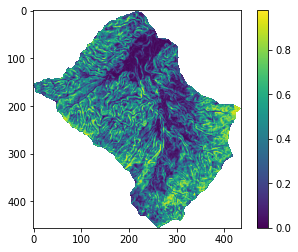

In [ ]:
#mascara para crear el mapa de la cuenca
file = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING\datos/raster/slope_rad')
pendiente = file.GetRasterBand(1)
pendiente = pendiente.ReadAsArray()

#Convertir el vector de resultados a la matriz del mapa de la cuenca a aprtir de la matriz de pendiente
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente==-3.4028234663852886e+38,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

## Curva ROC manual

A continuación se presenta como se puede evaluar el modelo a traves de la curva ROC

In [ ]:
#construcción de la Curva ROC
S=[] #Sensitivity
E=[] #Specificity
probs_df['predict']=np.where(probs_df[0]>=0.09,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.08,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.07,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.06,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.05,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.04,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.03,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.02,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.01,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

probs_df['predict']=np.where(probs_df[0]>=0.009,1,0)
cm=confusion_matrix(y_validation,probs_df['predict'])
s=cm[1,1]/(cm[1,1]+cm[1,0])
S.append(s)
e=cm[0,1]/(cm[0,0]+cm[0,1])
E.append(e)

#Curva ROC
plt.plot(E,S,marker='o')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')